In [3]:
!pip install plotly


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"



In [5]:
fact = pd.read_csv("data/processed/fact_orders.csv")

fact["OrderDate"] = pd.to_datetime(fact["OrderDate"])
fact.head()


,OrderID,OrderDate,EmployeeName,CompanyName,nb_commandes_livrees,nb_commandes_non_livrees
0,10248,1996-07-04,Steven Buchanan,Vins et alcools Chevalier,1,0
1,10249,1996-07-05,Michael Suyama,Toms Spezialit?ten,1,0
2,10250,1996-07-08,Margaret Peacock,Hanari Carnes,1,0
3,10251,1996-07-08,Janet Leverling,Victuailles en stock,1,0
4,10252,1996-07-09,Margaret Peacock,Supr?mes d?lices,1,0


In [6]:
fact.columns


Index(['OrderID', 'OrderDate', 'EmployeeName', 'CompanyName',
       'nb_commandes_livrees', 'nb_commandes_non_livrees'],
      dtype='object')

In [7]:
summary = (
    fact.groupby(
        ["OrderDate", "EmployeeName", "CompanyName"],
        dropna=False
    )[["nb_commandes_livrees", "nb_commandes_non_livrees"]]
    .sum()
    .reset_index()
)

summary["total_commandes"] = (
    summary["nb_commandes_livrees"] + summary["nb_commandes_non_livrees"]
)

summary.head()


,OrderDate,EmployeeName,CompanyName,nb_commandes_livrees,nb_commandes_non_livrees,total_commandes
0,1996-07-04,Steven Buchanan,Vins et alcools Chevalier,1,0,1
1,1996-07-05,Michael Suyama,Toms Spezialit?ten,1,0,1
2,1996-07-08,Janet Leverling,Victuailles en stock,1,0,1
3,1996-07-08,Margaret Peacock,Hanari Carnes,1,0,1
4,1996-07-09,Margaret Peacock,Supr?mes d?lices,1,0,1


In [13]:
fig = px.scatter_3d(
    summary,
    x="OrderDate",
    y="EmployeeName",
    z="CompanyName",
    color="nb_commandes_livrees",
    size="total_commandes",
    hover_data={
        "OrderDate": True,
        "EmployeeName": True,
        "CompanyName": True,
        "nb_commandes_livrees": True,
        "nb_commandes_non_livrees": True
    },
    labels={
        "OrderDate": "Date",
        "EmployeeName": "Employé",
        "CompanyName": "Client",
        "nb_commandes_livrees": "Commandes livrées"
    },
    height=700,
    title="Commandes livrées / non livrées par employé, client et date (3D)"
)

fig.update_layout(
    scene=dict(
        xaxis_title="Date",
        yaxis_title="Employé",
        zaxis_title="Client"
    )
)
fig.write_html("outputs/figures/commandes_3D_livrees_non_livrees.html")

fig.show()


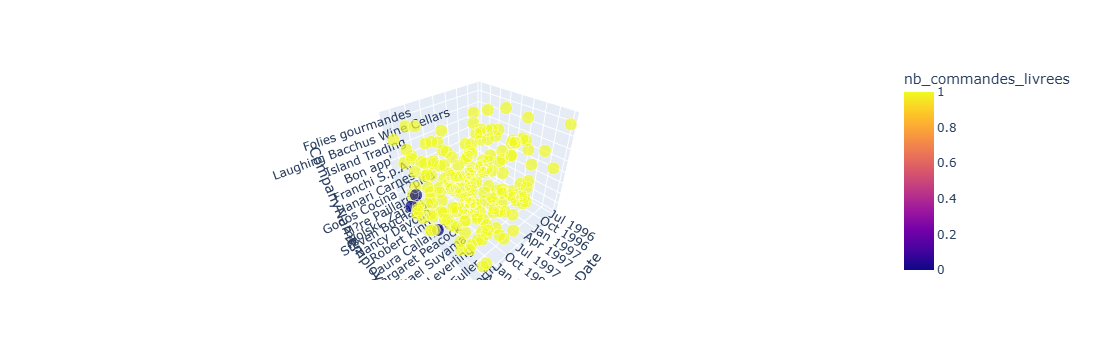

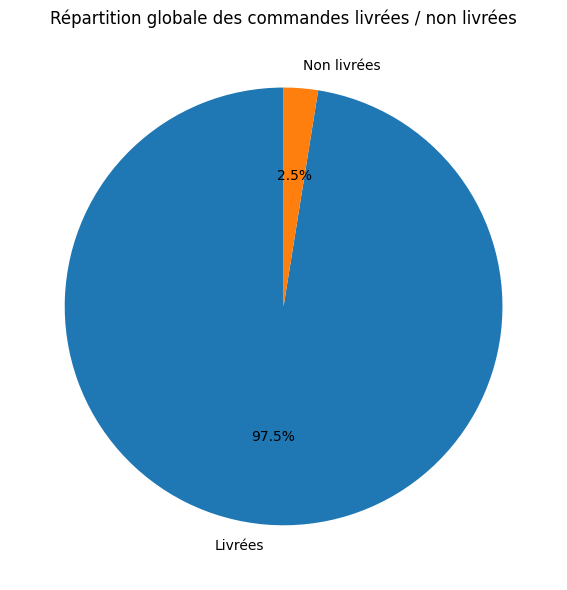

In [15]:

livrees = fact["nb_commandes_livrees"].sum()
non_livrees = fact["nb_commandes_non_livrees"].sum()

plt.figure(figsize=(6,6))
plt.pie(
    [livrees, non_livrees],
    labels=["Livrées", "Non livrées"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Répartition globale des commandes livrées / non livrées")
plt.tight_layout()
plt.savefig("outputs/figures/repartition_livrees_non_livrees.png")
plt.show()


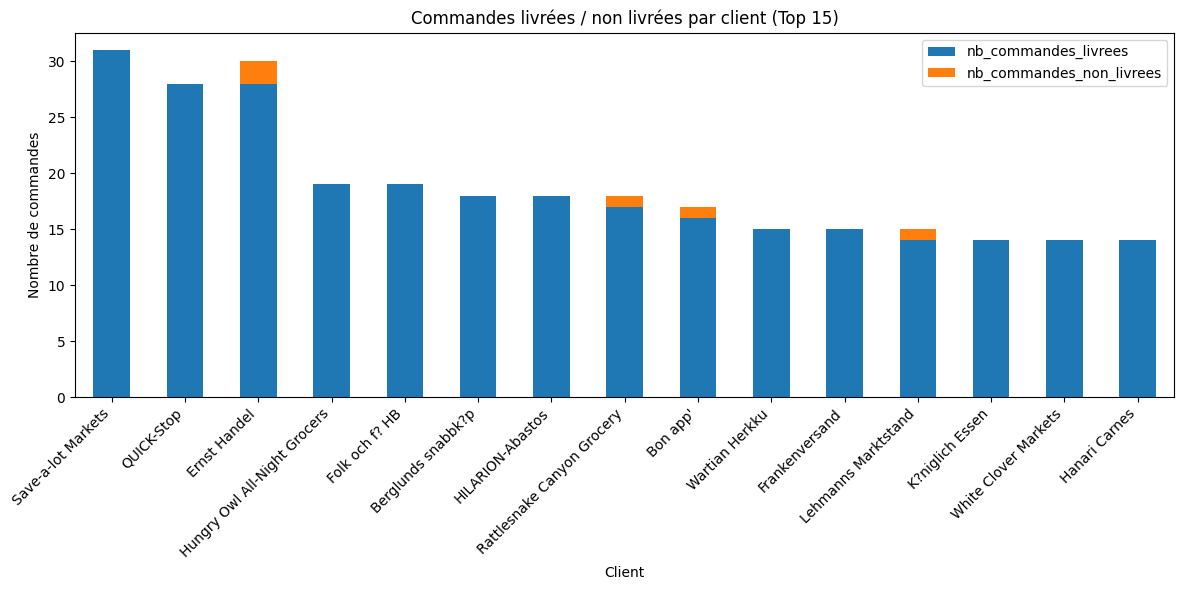

In [17]:
client_stats = (
    fact.groupby("CompanyName")[["nb_commandes_livrees", "nb_commandes_non_livrees"]]
    .sum()
    .sort_values("nb_commandes_livrees", ascending=False)
    .head(15)  # top 15 clients
)

client_stats.plot(
    kind="bar",
    stacked=True,
    figsize=(12,6)
)

plt.title("Commandes livrées / non livrées par client (Top 15)")
plt.ylabel("Nombre de commandes")
plt.xlabel("Client")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("outputs/figures/livrees_non_livrees_par_client.png")
plt.show()


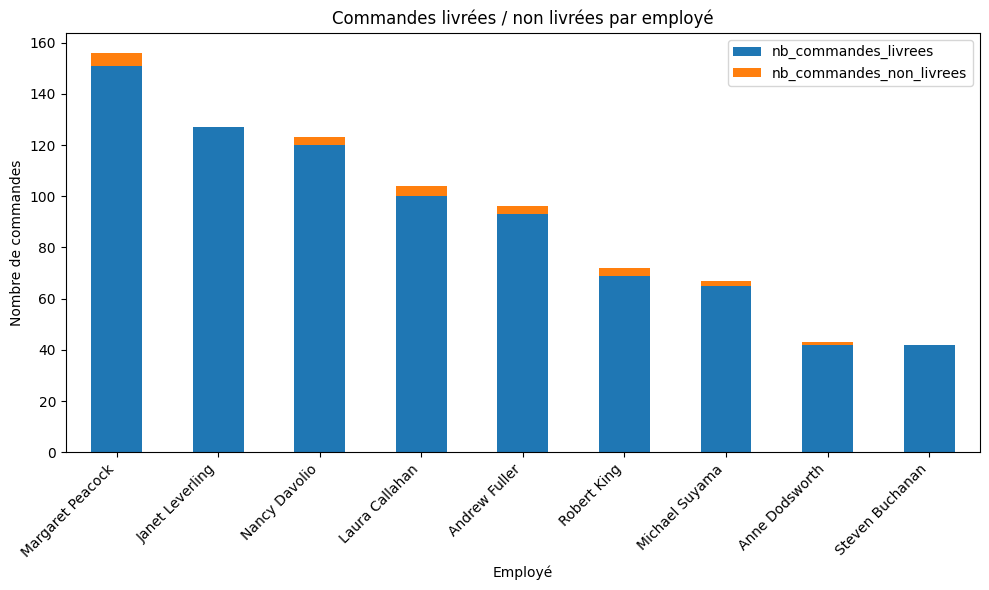

In [18]:
employee_stats = (
    fact.groupby("EmployeeName")[["nb_commandes_livrees", "nb_commandes_non_livrees"]]
    .sum()
    .sort_values("nb_commandes_livrees", ascending=False)
)

employee_stats.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6)
)

plt.title("Commandes livrées / non livrées par employé")
plt.ylabel("Nombre de commandes")
plt.xlabel("Employé")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("outputs/figures/livrees_non_livrees_par_employe.png")
plt.show()


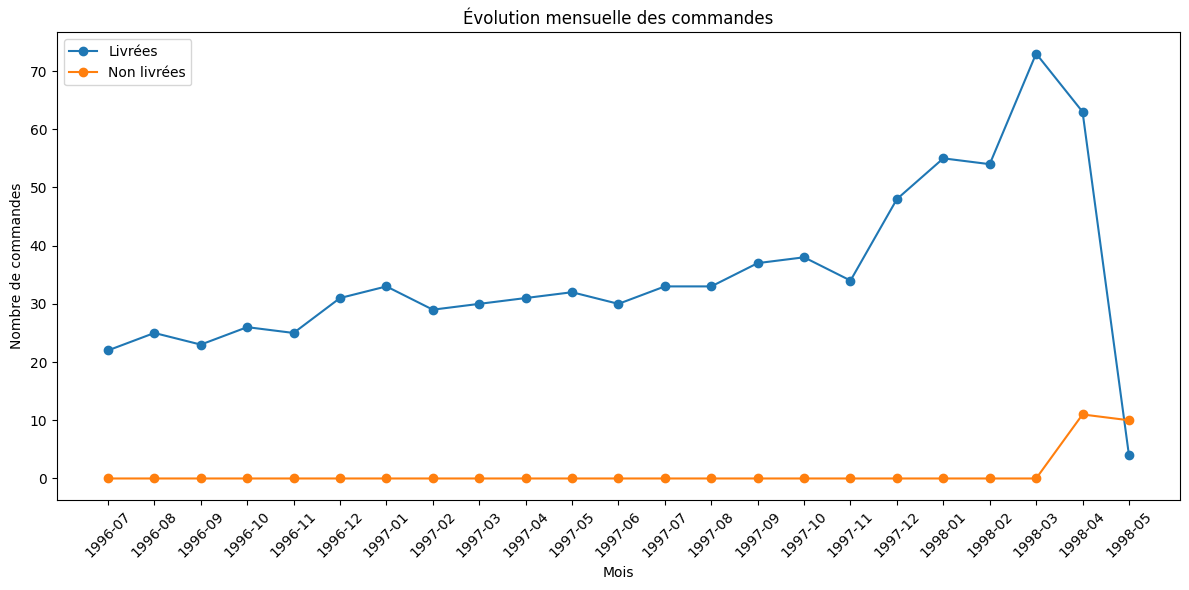

In [20]:
fact["OrderDate"] = pd.to_datetime(fact["OrderDate"])
fact["Mois"] = fact["OrderDate"].dt.to_period("M").astype(str)

monthly = (
    fact.groupby("Mois")[["nb_commandes_livrees", "nb_commandes_non_livrees"]]
    .sum()
)

plt.figure(figsize=(12,6))
plt.plot(monthly.index, monthly["nb_commandes_livrees"], label="Livrées", marker="o")
plt.plot(monthly.index, monthly["nb_commandes_non_livrees"], label="Non livrées", marker="o")

plt.title("Évolution mensuelle des commandes")
plt.xlabel("Mois")
plt.ylabel("Nombre de commandes")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("outputs/figures/evolution_mensuelle_commandes.png")
plt.show()
